(120, 120)
(120, 120, 3)


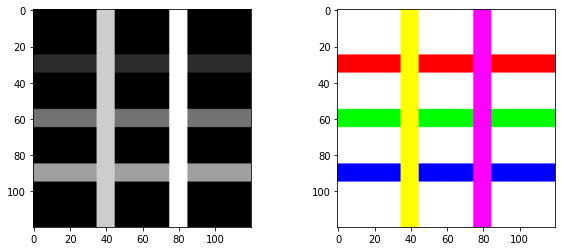

In [1]:
import numpy as np
import matplotlib.pyplot as plt

gray = np.zeros((120,120), dtype=np.uint8)   # 120x120 2차원 배열 생성, 검은색 흑백 이미지
gray[25:35,:]  = 45                          # 25~35행 모든 열에 45 할당 
gray[55:65,:]  = 115                         # 55~65행 모든 열에 115 할당 
gray[85:95,:]  = 160                         # 85~95행 모든 열에 160 할당 
gray[:, 35:45] = 205                         # 모든행 35~45 열에 205 할당 
gray[:, 75:85] = 255
print(gray.shape)

rgb = np.full((120,120, 3), fill_value=(255,255,255), dtype=np.uint8)    # 120x120 2차원 배열 생성, 3채널 컬러 이미지
rgb[25:35,:]  = [255,0,0]                       # 25~35행 모든 열에 [255,0,0], 빨강색 할당 
rgb[55:65,:]  = [0, 255, 0]                     # 55~65행 모든 열에 [0,255,0], 초록색 할당 
rgb[85:95,:]  = [0,0,255]                       # 85~95행 모든 열에 [0,0,255], 파랑색 할당 
rgb[:, 35:45] = [255,255,0]                     # 모든행 35~45 열에 [255,255,0], 하늘색 할당 
rgb[:, 75:85] = [255,0,255]
print(rgb.shape)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(rgb)
plt.show()

Text(0.5, 1.0, 'gx + gy')

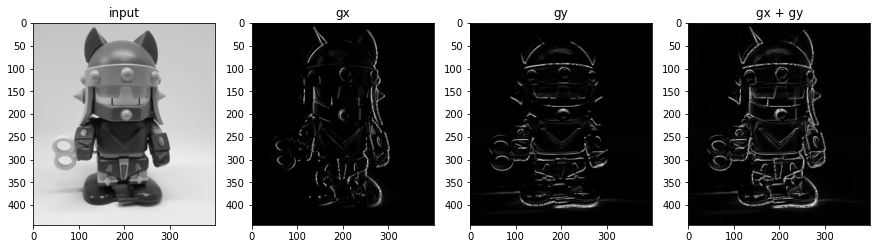

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('./img/tkv.jpg', cv2.IMREAD_GRAYSCALE)
(h,w) = img.shape
x = img.reshape(1,h,w,1).astype(np.float32)

# x 방향 미분 커널
gx_k = np.array([[-1,0,1],
                 [-2,0,2],
                 [-1,0,1]])
gx_k = gx_k.reshape((3,3,1,1))

# y 방향 미분 커널
gy_k = np.array([[-1,-2,-1],
                 [0,0,0],
                 [1,2,1]])
gy_k = gy_k.reshape((3,3,1,1))

gx = tf.nn.conv2d(x, gx_k, [1,1,1,1], padding='SAME')
gx = gx.numpy()
gx[gx < 0 ] = 0  #음수 처리
gx = gx.reshape(h,w).astype(np.uint8)

gy = tf.nn.conv2d(x, gy_k, [1,1,1,1], padding='SAME')
gy = gy.numpy()
gy[gy < 0 ] = 0  #음수 처리
gy = gy.reshape(h,w).astype(np.uint8)

# 결과 출력
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.imshow(img, cmap='gray')
plt.title("input")
plt.subplot(142)
plt.imshow(gx, cmap='gray')
plt.title("gx")
plt.subplot(143)
plt.imshow(gy, cmap='gray')
plt.title("gy")
plt.subplot(144)
plt.imshow(gx + gy, cmap='gray')
plt.title("gx + gy")


[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[[[[4.]
   [5.]]

  [[7.]
   [8.]]]]


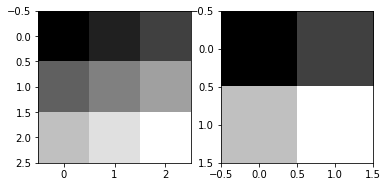

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

img = np.arange(9, dtype=np.float32).reshape(3,3)
print(img)
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

x = img.reshape(1,3,3,1)
ksize = 2 # [2,2] or [1,2,2,1]
strides = 1 # [1,1] or [1,1,1,1]

pool = tf.nn.max_pool(x, ksize=ksize, strides=strides, padding='VALID')       # max pool
pooled = pool.numpy()
print(pooled)
plt.subplot(1,2,2)
plt.imshow(pooled.reshape(2,2), cmap='gray')
plt.show()


In [4]:
import tensorflow as tf
import numpy as np

n_input = 28*28
n_L1 = 300
n_L2 = 100
n_output = 10

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0
X_train = X_train[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2, 2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu ), 
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(n_output, activation=tf.nn.softmax)
])
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Test Accuracy:{}".format(test_acc))


11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                12

In [5]:
import tensorflow as tf
import numpy as np

def make_LeNet(input_shape=(32, 32,1), output=10):
    padding = 'valid'
    if input_shape[0] < 32:
        padding = 'same'
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(6, 5, padding=padding, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(16, 5, activation='relu'),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(120, 5, activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(84, activation='relu' ), 
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(output, activation='softmax')
    ])
    return model

model = make_LeNet()
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 120)              

In [6]:
from tensorflow.keras.applications import VGG16

IMG_SIZE = 224
vgg16 = VGG16(weights='imagenet',
                  include_top=True,
                  input_shape=(IMG_SIZE, IMG_SIZE, 3))
vgg16.summary()



553476096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

49152/35363 [=========================================] - 0s 0us/step


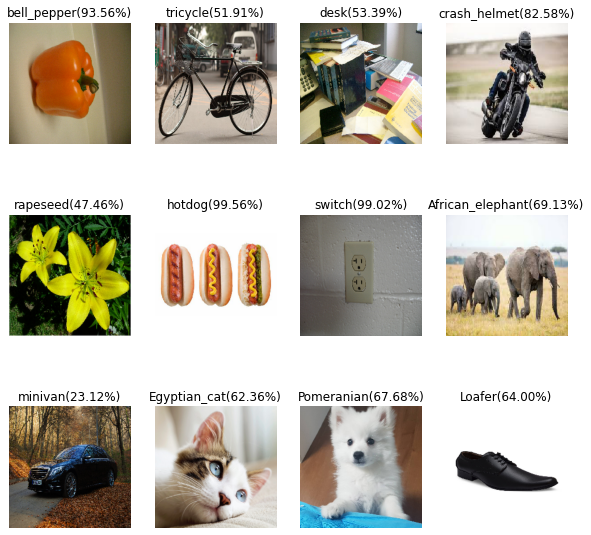

In [7]:
## 메터모스트에서 others.zip을 다운받아 현재코드와 같은 폴더에 압축해제하세요
## 위코드를 실행 후 새로 셀을 만들어 아래 셀을 실행하세요.


import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np
import glob
import matplotlib.pyplot as plt
import math

test_dir_path = './others/*.*'
test_paths = glob.glob(test_dir_path)

plt.figure(figsize=(10,10))
for i, path in enumerate(test_paths):
    img = tf.keras.preprocessing.image.load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
    img_arr = tf.keras.preprocessing.image.img_to_array(img)#, dtype=np.uint8)
    img_arr = tf.expand_dims(img_arr, 0)

    pred = vgg16.predict(preprocess_input(img_arr))
    decoded = decode_predictions(pred)[0]
    plt.subplot(math.ceil(len(test_paths)/4), 4, i+1)
    plt.imshow(img)
    plt.title(f'{decoded[0][1]}({decoded[0][2]*100:.2f}%)')
    plt.axis('off')
plt.show()




In [8]:
!pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.0.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.0
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.4
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.4
branca                        0.5.0
bs4                           0.0.1
CacheC

In [9]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [10]:
from tensorflow.keras import models, layers, optimizers

model = models.Sequential(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [11]:
# !cat

In [12]:
import os
os.environ['KAGGLE_USERNAME'] = 'USERNAME아이디'
os.environ['KAGGLE_KEY'] = '비밀번호'
!kaggle competitions download -c dogs-vs-cats






100% 812M/812M [00:04<00:00, 247MB/s]
100% 812M/812M [00:04<00:00, 203MB/s]


In [13]:
!dir *.zip

dogs-vs-cats.zip


In [14]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [15]:
# dogs-vs-cats.zip 압축해제하세요


import zipfile
import os
dir_path = 'cat_dog'

if not os.path.exists(dir_path):
    os.makedirs(dir_path)

with zipfile.ZipFile("train.zip" , "r") as zip_ref:
    zip_ref.extractall(dir_path)

sub_dirs = ['train', 'test']
label_dirs = ['cat', 'dog']
for sub_dir in sub_dirs:
    for label_dir in label_dirs:
        os.makedirs(os.path.join(dir_path, sub_dir, label_dir), exist_ok=True)


In [16]:
!dir cat_dog/test/cat

In [17]:
import glob
import random
import shutil

files = glob.glob(dir_path + '/train/*.jpg')
split_ratio = 0.25

for file in files:
    filename = os.path.basename(file)
    print('file copying...', file, end='\r')
    dst_dir = 'train'
    if random.random() < split_ratio :
        dst_dir = 'test'
    if filename.startswith('cat'):
        dst = os.path.join(dir_path, dst_dir, 'cat', filename)
    else :
        dst = os.path.join(dir_path, dst_dir, 'dog', filename)
    shutil.copyfile(file, dst)
print('copy done.')


copy done.


In [18]:
!dir cat_dog/test/cat

cat.0.jpg      cat.12191.jpg  cat.3243.jpg  cat.5419.jpg  cat.7776.jpg
cat.10002.jpg  cat.12192.jpg  cat.3248.jpg  cat.541.jpg   cat.7784.jpg
cat.10006.jpg  cat.12201.jpg  cat.3250.jpg  cat.5422.jpg  cat.7791.jpg
cat.1000.jpg   cat.12204.jpg  cat.3252.jpg  cat.5425.jpg  cat.7799.jpg
cat.10016.jpg  cat.12207.jpg  cat.3254.jpg  cat.5426.jpg  cat.7803.jpg
cat.10018.jpg  cat.1220.jpg   cat.3263.jpg  cat.542.jpg   cat.7806.jpg
cat.10027.jpg  cat.12219.jpg  cat.3269.jpg  cat.5435.jpg  cat.7819.jpg
cat.10031.jpg  cat.12221.jpg  cat.326.jpg   cat.5438.jpg  cat.7823.jpg
cat.10034.jpg  cat.12234.jpg  cat.3271.jpg  cat.5449.jpg  cat.7824.jpg
cat.10043.jpg  cat.12238.jpg  cat.3272.jpg  cat.5457.jpg  cat.7831.jpg
cat.10053.jpg  cat.12245.jpg  cat.3273.jpg  cat.5458.jpg  cat.7834.jpg
cat.10054.jpg  cat.12249.jpg  cat.3284.jpg  cat.545.jpg   cat.7837.jpg
cat.10064.jpg  cat.12254.jpg  cat.3296.jpg  cat.5464.jpg  cat.7839.jpg
cat.1006.jpg   cat.12261.jpg  cat.3297.jpg  cat.5470.jpg  cat.7843.jpg
cat.10

Found 18799 images belonging to 2 classes.
Found 6201 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
100/100 - 49s - loss: 0.3489 - acc: 0.8400 - val_loss: 0.1587 - val_acc: 0.9360 - 49s/epoch - 486ms/step
Epoch 2/30
100/100 - 41s - loss: 0.2066 - acc: 0.9150 - val_loss: 0.2152 - val_acc: 0.9070 - 41s/epoch - 414ms/step
Epoch 3/30
100/100 - 41s - loss: 0.1803 - acc: 0.9310 - val_loss: 0.1181 - val_acc: 0.9530 - 41s/epoch - 414ms/step
Epoch 4/30
100/100 - 41s - loss: 0.1497 - acc: 0.9350 - val_loss: 0.3727 - val_acc: 0.8800 - 41s/epoch - 414ms/step
Epoch 5/30
100/100 - 41s - loss: 0.1383 - acc: 0.9525 - val_loss: 0.1318 - val_acc: 0.9500 - 41s/epoch - 414ms/step
Epoch 6/30
100/100 - 41s - loss: 0.1339 - acc: 0.9430 - val_loss: 0.0841 - val_acc: 0.9690 - 41s/epoch - 413ms/step
Epoch 7/30
100/100 - 41s - loss: 0.1166 - acc: 0.9505 - val_loss: 0.1945 - val_acc: 0.9350 - 41s/epoch - 414ms/step
Epoch 8/30
100/100 - 41s - loss: 0.1115 - acc: 0.9540 - val_loss: 0.0760 - val_acc: 0.9760 - 41s/epoch - 413ms/step
Epoch 9/30
100/100 - 41s - loss: 0.0902 - acc: 0.9635 - val_loss: 0.1048

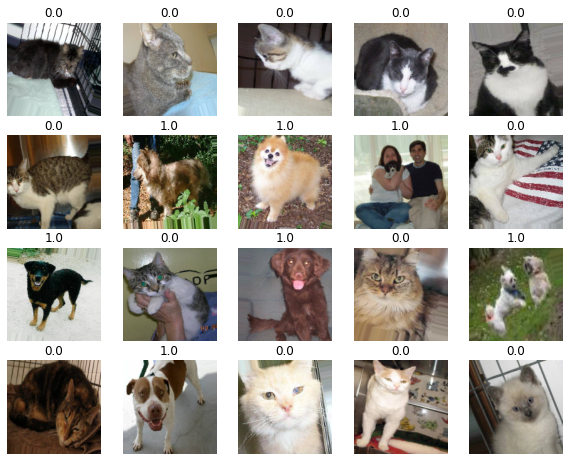

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255) #검증 데이타, 증식 없슴
train_generator = train_datagen.flow_from_directory(
        os.path.join(dir_path, 'train'), # 타깃 디렉터리
        target_size=(150, 150),# 모든 이미지의 크기를 150 × 150로 변경
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        os.path.join(dir_path, 'test'),
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')



image_batch, label_batch = next(train_generator)

plt.figure(figsize=(10,10))
for n in range(20):
    plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(label_batch[n])
    plt.axis('off')



model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)


In [22]:
loss_after,accuracy_after = model.evaluate(validation_generator)
print("Test Accuracy:{}".format(accuracy_after))

311/311 [==============================] - 42s 134ms/step - loss: 0.0706 - acc: 0.9718
Test Accuracy:0.9717787504196167


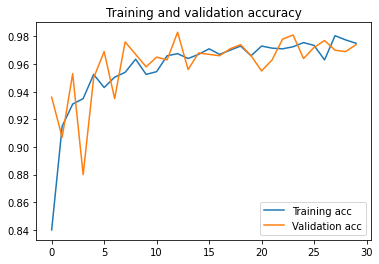

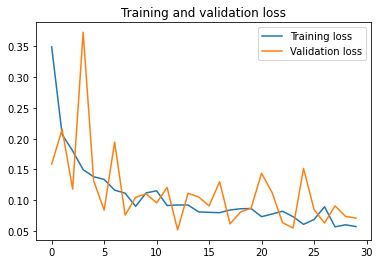

In [23]:
model.save('cats_and_dogs_small_3.h5')


import matplotlib.pyplot as plt 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc,  label='Training acc')
plt.plot(epochs, val_acc,  label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss,  label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


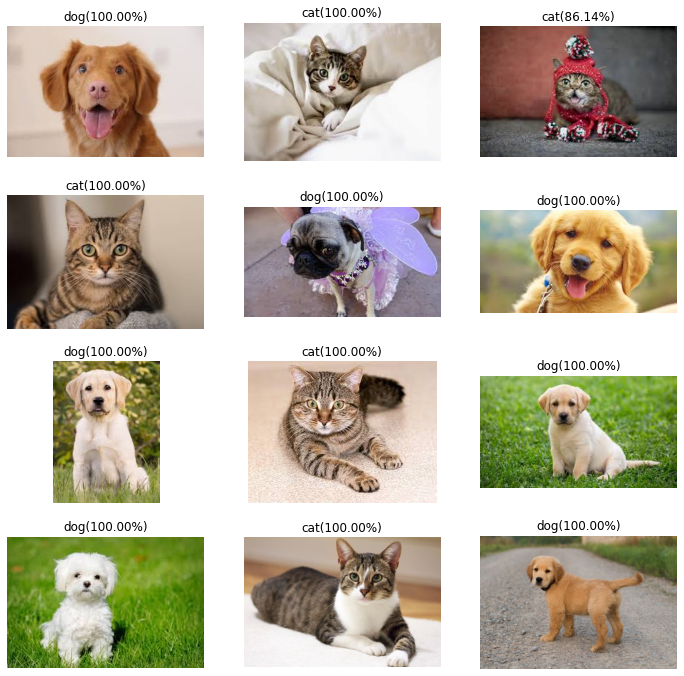

In [3]:
# VGGNet 개,고양이 분류 테스트

import tensorflow as tf
from tensorflow.keras.preprocessing import image
import cv2,glob,math,numpy as np
import matplotlib.pyplot as plt

pet_dir = './pet/*.*'
labels = ['cat', 'dog']
IMG_SIZE = 150
model = tf.keras.models.load_model('cats_and_dogs_small_3.h5')
paths =  glob.glob(pet_dir)
plt.figure(figsize=(12,12))
for i, path in enumerate(paths) :
    img = cv2.imread(path)[:,:,::-1]
    pet = img.copy().astype(np.float32)
    pet = cv2.resize(pet, (IMG_SIZE, IMG_SIZE))/255.0
    pet = np.expand_dims(pet, axis=0)
    pred = model.predict(pet)[0]
    label = tf.argmax(pred)
    pet_name =  labels[label.numpy()]
    plt.subplot(math.ceil(len(paths)/3), 3, i+1)
    plt.imshow(img)
    if pred[label]*100 > 50:
      pet_name = labels[1]
    elif pred[label]*100 < 50:
      pred[label] = 1 - pred[label]
    plt.title(f'{pet_name}({pred[label]*100:.2f}%)')
    plt.axis('off')
